In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')
data = pd.read_csv('Bankchurn data.csv', index_col=0)
import seaborn as sns

In [2]:
from pandas_profiling import ProfileReport
from sklearn.model_selection import train_test_split
import random
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import lightgbm as lgb
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
random.seed(10)

In [3]:
data.head(5)

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
id,,,,,,,,,,,,,
0,15674932,Okwudilichukwu,668,France,Male,33.0,3,0.00,2,1,0,181449.97,0
1,15749177,Okwudiliolisa,627,France,Male,33.0,1,0.00,2,1,1,49503.50,0
2,15694510,Hsueh,678,France,Male,40.0,10,0.00,2,1,0,184866.69,0
3,15741417,Kao,581,France,Male,34.0,2,148882.54,1,1,1,84560.88,0
4,15766172,Chiemenam,716,Spain,Male,33.0,5,0.00,2,1,1,15068.83,0


In [4]:
data.isna().sum()

CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [5]:
data.shape

(165034, 13)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 165034 entries, 0 to 165033
Data columns (total 13 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   CustomerId       165034 non-null  int64  
 1   Surname          165034 non-null  object 
 2   CreditScore      165034 non-null  int64  
 3   Geography        165034 non-null  object 
 4   Gender           165034 non-null  object 
 5   Age              165034 non-null  float64
 6   Tenure           165034 non-null  int64  
 7   Balance          165034 non-null  float64
 8   NumOfProducts    165034 non-null  int64  
 9   HasCrCard        165034 non-null  int64  
 10  IsActiveMember   165034 non-null  int64  
 11  EstimatedSalary  165034 non-null  float64
 12  Exited           165034 non-null  int64  
dtypes: float64(3), int64(7), object(3)
memory usage: 17.6+ MB


In [7]:
df = pd.DataFrame(data)

In [8]:
columns_to_drop = ['CustomerId', 'Surname']
df = df.drop(columns_to_drop, axis=1)

In [9]:
df.head(3)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
id,,,,,,,,,,,
0,668,France,Male,33.0,3,0.0,2,1,0,181449.97,0
1,627,France,Male,33.0,1,0.0,2,1,1,49503.50,0
2,678,France,Male,40.0,10,0.0,2,1,0,184866.69,0


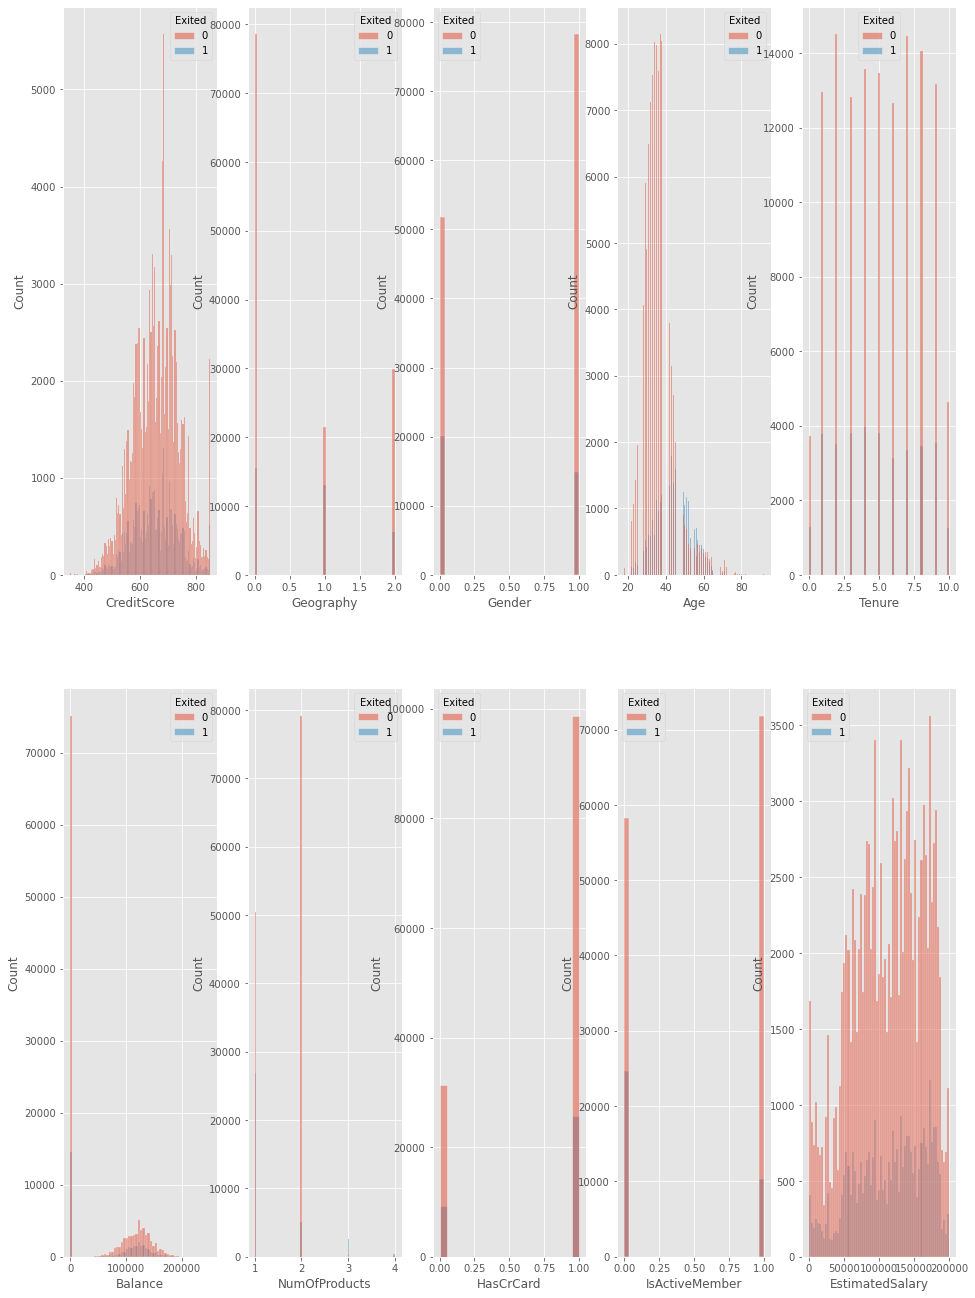

In [35]:
fig, axs = plt.subplots(nrows=2, ncols=5, figsize=(16,23))
axs=axs.flat
for i in range(len(df.columns)-1):
    sns.histplot(data=df, x=df.columns[i],hue="Exited",ax=axs[i])

In [11]:
#sns.pairplot(df)

In [12]:
df["Exited"].value_counts()

0    130113
1     34921
Name: Exited, dtype: int64

In [13]:
obj_cols = ['Geography','Gender','Exited','IsActiveMember']

def convert_to_num(df):
    for col in obj_cols:
        Ly = LabelEncoder()
        df[str(col)] = Ly.fit_transform(df[str(col)])
        df[str(col)]=df[str(col)].astype(np.int8)
    return df
df = convert_to_num(df)

<AxesSubplot:>

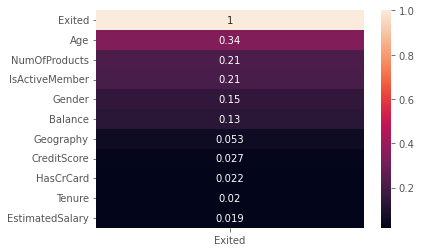

In [14]:
corr=df.corr()["Exited"]
corr=corr.abs().sort_values(ascending=False)
sns.heatmap(data=corr.to_frame(),annot=True)

In [15]:
df_model=df.drop(columns=["CreditScore","Tenure","EstimatedSalary","HasCrCard"])

In [16]:
print(df['Age'].corr(df['Gender']))
print(df['NumOfProducts'].corr(df['IsActiveMember']))

-0.06313874149241533
0.03973606951105386


In [17]:
print(df['Age'].corr(df['Geography']))
print(df['Gender'].corr(df['Geography']))
print(df['IsActiveMember'].corr(df['Geography']))

0.03410964986309756
-0.012092024927375097
-0.0034926397337801786


In [18]:
print(df['Age'].corr(df['NumOfProducts']))
print(df['Gender'].corr(df['NumOfProducts']))
print(df['Gender'].corr(df['IsActiveMember']))

-0.10219491209579266
0.026097803793783566
0.033722095658424


In [19]:
#continuous = ['Age','Balance','NumOfProdcts']
#categoricals = ['IsActiveMember','Gender','Geography','Exited']

In [20]:
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, roc_auc_score

In [21]:
X=df_model.drop("Exited",axis=1)
y=df_model["Exited"]

In [22]:
scaler=StandardScaler()
X_scaled=scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_scaled,y,test_size=0.20, random_state=42)

In [23]:
Rm_model=RandomForestClassifier(random_state=42)
Rm_model.fit(X_train,y_train)
y_predict=Rm_model.predict(X_test)
y_prob = Rm_model.predict_proba(X_test)[:, 1]
acc_rm=accuracy_score(y_test,y_predict)

In [24]:
confusion_matrix(y_test,y_predict)

array([[23830,  2222],
       [ 3085,  3870]], dtype=int64)

In [25]:
print(f' Accuracy for bank churn using Random forest Classifier: {round(acc_rm,1)}')
print(classification_report(y_test, y_predict))

 Accuracy for bank churn using Random forest Classifier: 0.8
              precision    recall  f1-score   support

           0       0.89      0.91      0.90     26052
           1       0.64      0.56      0.59      6955

    accuracy                           0.84     33007
   macro avg       0.76      0.74      0.75     33007
weighted avg       0.83      0.84      0.84     33007



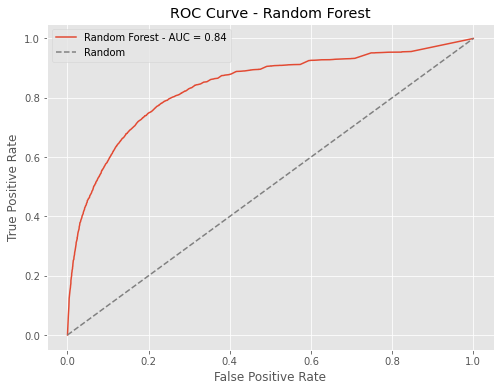

In [26]:
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
auc = roc_auc_score(y_test, y_prob)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'Random Forest - AUC = {auc:.2f}')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random')
plt.title('ROC Curve - Random Forest')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

In [27]:
import lightgbm as lgb

In [28]:
Lgbm_model = lgb.LGBMClassifier()
Lgbm_model.fit(X_train, y_train)
y_pred = Lgbm_model.predict(X_test)
y_probab = Lgbm_model.predict_proba(X_test)[:, 1]
acc_lgb = accuracy_score(y_test, y_pred)

In [29]:
confusion_matrix(y_test,y_pred)

array([[24702,  1350],
       [ 3045,  3910]], dtype=int64)

In [30]:
print(f' Accuracy for bank churn using LightGBM: {round(acc_lgb,1)}')
print(classification_report(y_test, y_pred))

 Accuracy for bank churn using LightGBM: 0.9
              precision    recall  f1-score   support

           0       0.89      0.95      0.92     26052
           1       0.74      0.56      0.64      6955

    accuracy                           0.87     33007
   macro avg       0.82      0.76      0.78     33007
weighted avg       0.86      0.87      0.86     33007



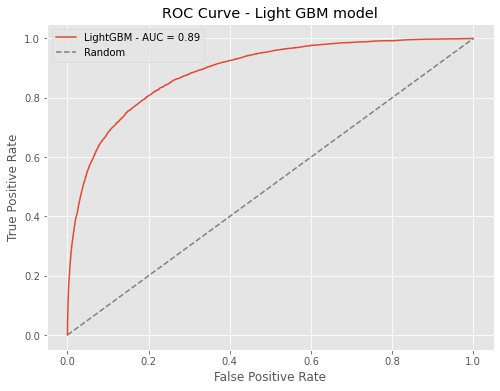

In [31]:
fpr, tpr, thresholds = roc_curve(y_test, y_probab)
auc = roc_auc_score(y_test, y_probab)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'LightGBM - AUC = {auc:.2f}')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random')
plt.title('ROC Curve - Light GBM model')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

In [32]:
pip install lightgbm matplotlib

Note: you may need to restart the kernel to use updated packages.


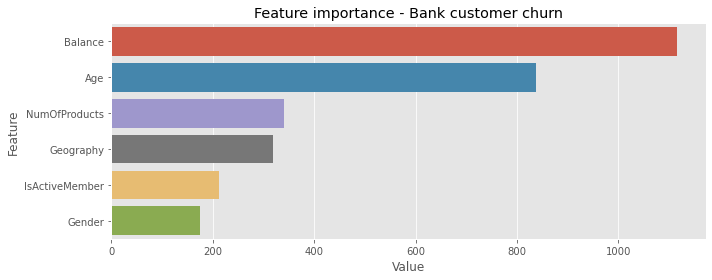

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# sorted(zip(clf.feature_importances_, X.columns), reverse=True)
feature_imp = pd.DataFrame(sorted(zip(Lgbm_model.feature_importances_,X.columns)), columns=['Value','Feature'])

plt.figure(figsize=(10, 4))
sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value", ascending=False))
plt.title('Feature importance - Bank customer churn')
plt.tight_layout()
plt.show()
#plt.savefig('df_education_importances-01.png')